In [2]:
#conda install -c conda-forge geopandas
#conda install -c conda-forge geoplot
#conda install pysal

In [1]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import os

In [2]:
%matplotlib inline

In [3]:
data_root = os.path.join("/", "mnt", "hgfs", "Temp", "data", "lad")
path = os.path.join(data_root, "Regions_(December_2017)_Boundaries.shp")
lad = gpd.read_file(path)
lad.head(15)

,objectid,rgn17cd,rgn17nm,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,E12000001,North East,417313,600358,-1.728900,55.297031,8.592522e+09,9.831597e+05,"MULTIPOLYGON (((398253.902 652833.898, 398317...."
1,2,E12000002,North West,350015,506280,-2.772370,54.449451,1.416376e+10,2.004965e+06,"MULTIPOLYGON (((357012.898 586734.198, 356931...."
2,3,E12000003,Yorkshire and The Humber,446903,448736,-1.287120,53.932640,1.540936e+10,1.359099e+06,"MULTIPOLYGON (((478203.003 518916.601, 478373...."
3,4,E12000004,East Midlands,477660,322635,-0.849670,52.795719,1.564318e+10,1.298010e+06,"MULTIPOLYGON (((512490.996 414654.696, 512679...."
4,5,E12000005,West Midlands,386294,295477,-2.203580,52.556969,1.300373e+10,9.211872e+05,"POLYGON ((403387.797 368314.900, 403515.999 36..."
5,6,E12000006,East of England,571074,263229,0.504146,52.240669,1.913508e+10,2.544254e+06,"MULTIPOLYGON (((600697.699 346562.497, 601108...."
6,7,E12000007,London,517516,178392,-0.308640,51.492271,1.573497e+09,4.096635e+05,"MULTIPOLYGON (((531457.201 200860.204, 531788...."
7,8,E12000008,South East,470062,172924,-0.993110,51.450970,1.908865e+10,2.344044e+06,"MULTIPOLYGON (((443908.801 113170.205, 443886...."
8,9,E12000009,South West,285015,102567,-3.633430,50.811192,2.385192e+10,3.189561e+06,"MULTIPOLYGON (((416693.503 245007.097, 416810...."


In [4]:
lad = lad.rename(columns={'rgn17nm': 'Government_Office_Region'})

<AxesSubplot:>

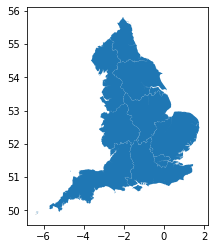

In [33]:
lad.plot()

In [20]:
lad.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: UK - Britain and UKCS 49°46'N to 61°01'N, 7°33'W to 3°33'E
- bounds: (-9.2, 49.75, 2.88, 61.14)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [30]:
lad = lad.to_crs(4326)

In [31]:
lad.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [32]:
lad

,objectid,rgn17cd,Government_Office_Region,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,E12000001,North East,417313,600358,-1.728900,55.297031,8.592522e+09,9.831597e+05,"MULTIPOLYGON (((-2.02941 55.76884, -2.02840 55..."
1,2,E12000002,North West,350015,506280,-2.772370,54.449451,1.416376e+10,2.004965e+06,"MULTIPOLYGON (((-2.67644 55.17304, -2.67769 55..."
2,3,E12000003,Yorkshire and The Humber,446903,448736,-1.287120,53.932640,1.540936e+10,1.359099e+06,"MULTIPOLYGON (((-0.79223 54.55947, -0.78962 54..."
3,4,E12000004,East Midlands,477660,322635,-0.849670,52.795719,1.564318e+10,1.298010e+06,"MULTIPOLYGON (((-0.30093 53.61639, -0.29824 53..."
4,5,E12000005,West Midlands,386294,295477,-2.203580,52.556969,1.300373e+10,9.211872e+05,"POLYGON ((-1.95073 53.21190, -1.94881 53.21166..."
5,6,E12000006,East of England,571074,263229,0.504146,52.240669,1.913508e+10,2.544254e+06,"MULTIPOLYGON (((0.98795 52.97884, 0.99399 52.9..."
6,7,E12000007,London,517516,178392,-0.308640,51.492271,1.573497e+09,4.096635e+05,"MULTIPOLYGON (((-0.09954 51.69111, -0.09478 51..."
7,8,E12000008,South East,470062,172924,-0.993110,51.450970,1.908865e+10,2.344044e+06,"MULTIPOLYGON (((-1.37675 50.91632, -1.37707 50..."
8,9,E12000009,South West,285015,102567,-3.633430,50.811192,2.385192e+10,3.189561e+06,"MULTIPOLYGON (((-1.75768 52.10316, -1.75598 52..."


In [6]:
pop_df = pd.read_csv("./Pop_Data.csv")

In [7]:
pop_df

,Unnamed: 0,ID,Government_Office_Region,Age,Ethnicity,Ethnicity_Subgroup,Sexual_Orientation,Religion,Marital_Status,Gender,SE_Flag,Children,Couple_Contract,Take_Home_Pay,Housing_Element,Child_Element,Disabled_Child_Element,Childcare_Element,Carer_Element
0,0,0,East of England,23.0,MISSING,BRITISH,HETEROSEXUAL,CHRISTIAN,MARRIED_OR_IN_PARTNERSHIP,MISSING,0,MISSING,f,852.971558,130.861293,24.883432,3.691213e-07,1.344743e-77,5.265570e-04
1,1,1,Scotland,39.0,Mixed,MISSING,MISSING,MISSING,MISSING,MISSING,0,0,f,1.091760,18.529730,137.800963,5.590162e-36,2.336010e-05,1.726342e-14
2,2,2,East of England,23.0,MISSING,BRITISH,HETEROSEXUAL,CHRISTIAN,MARRIED_OR_IN_PARTNERSHIP,MISSING,0,MISSING,f,2968.933814,571.797416,21.016425,1.045629e-25,1.849827e-27,3.945154e+00
3,3,3,East of England,23.0,MISSING,BRITISH,HETEROSEXUAL,CHRISTIAN,MARRIED_OR_IN_PARTNERSHIP,MISSING,0,MISSING,f,0.047483,44.997558,13.697394,2.616981e-29,1.831121e-01,1.244432e+01
4,4,4,West Midlands,57.0,White,MISSING,MISSING,NONE,NOT_MARRIED_OR_IN_PARTNERSHIP,MISSING,0,2,t,1.175643,12.155080,238.792753,1.018891e+01,1.024755e-30,4.734092e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,99995,London,29.0,MISSING,BRITISH,HETEROSEXUAL,MISSING,MISSING,MISSING,0,0,f,0.843018,245.052176,49.863397,1.934847e-31,6.677242e-04,3.631471e-04
99996,99996,99996,West Midlands,61.0,White,MISSING,MISSING,NONE,NOT_MARRIED_OR_IN_PARTNERSHIP,MISSING,1,2,t,0.851209,188.161627,17.626568,2.048631e-16,1.071753e-31,8.340812e-04
99997,99997,99997,London,26.0,MISSING,BRITISH,HETEROSEXUAL,MISSING,MISSING,MISSING,0,0,f,25.976288,49.376426,1.902912,7.691198e-29,2.583254e-246,2.191551e-03
99998,99998,99998,Scotland,40.0,Prefer not to say,MISSING,MISSING,MISSING,MISSING,MISSING,0,0,f,0.120026,185.751584,57.317746,7.743291e-16,3.236907e-02,2.419819e-04


In [8]:
rows_region_df = pd.DataFrame(pop_df.groupby(['Government_Office_Region'], as_index=False)['ID'].count())

In [9]:
rows_region_df

,Government_Office_Region,ID
0,East Midlands,6290
1,East of England,7740
2,London,15440
3,MISSING,6580
4,North East,4180
5,North West,11520
6,Northern Ireland,2280
7,Scotland,7430
8,South East,10590
9,South West,6990


In [10]:
stats_gdf = pd.merge(lad, rows_region_df, on='Government_Office_Region', how='inner')

In [24]:
stats_gdf.bounds

,minx,miny,maxx,maxy
0,356180.3036,506235.7008,478445.6963,657534.1021
1,293942.0971,338994.1032,406087.1967,588517.3979
2,363191.4006,378564.2964,542203.4016,518916.6009
3,397829.1991,231283.0952,557492.2019,414654.6956
4,316114.5010,214364.4981,456472.5012,369909.5038
5,486508.5992,175092.2996,655644.7979,346804.6974
6,503575.0017,155850.7974,561956.6963,200933.6026
7,403098.6011,75257.1971,640168.7028,256158.2047
8,82672.0036,5342.6999,435913.4991,246053.7971


In [ ]:
import mapclassify
import geoplot

/home/ubuntu/miniconda3/envs/seagrass/lib/python3.7/site-packages/geoplot/crs.py:80: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.
  return getattr(ccrs, self.__class__.__name__)(**{**centerings, **self.args})


<GeoAxesSubplot:>

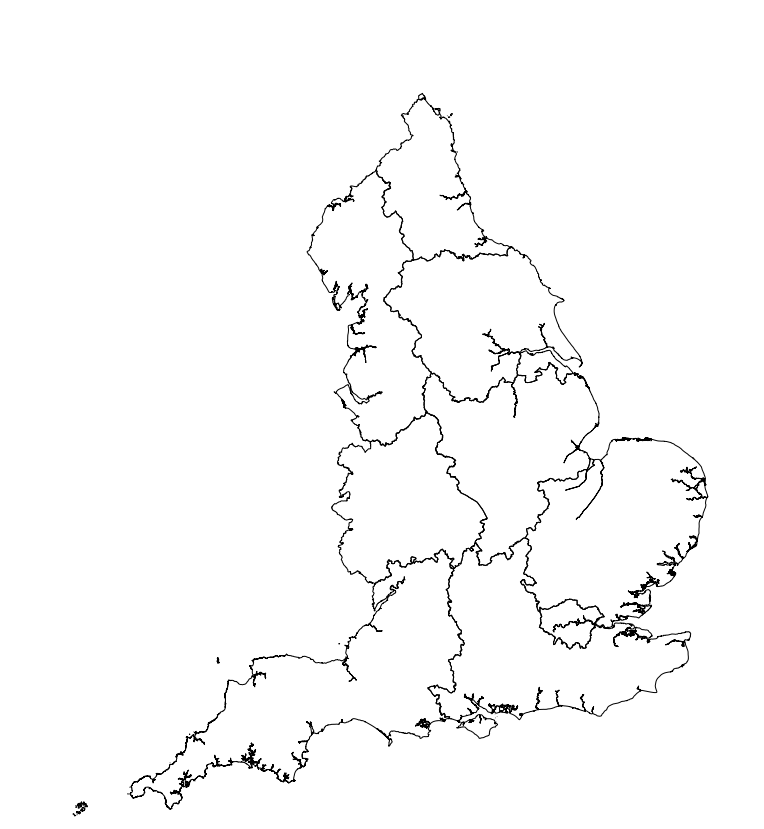

In [39]:
geoplot.polyplot(lad, projection=geoplot.crs.OSGB(), figsize=(15,15))



In [39]:
scheme

Quantiles                   

      Interval         Count
----------------------------
[ 4180.00,  6055.56] |     1
( 6055.56,  6834.44] |     1
( 6834.44,  7490.00] |     1
( 7490.00,  7834.44] |     1
( 7834.44,  8318.89] |     1
( 8318.89,  9416.67] |     1
( 9416.67, 10796.67] |     1
(10796.67, 11955.56] |     1
(11955.56, 15440.00] |     1

/home/ubuntu/miniconda3/envs/seagrass/lib/python3.7/site-packages/geoplot/crs.py:80: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.
  return getattr(ccrs, self.__class__.__name__)(**{**centerings, **self.args})


<GeoAxesSubplot:>

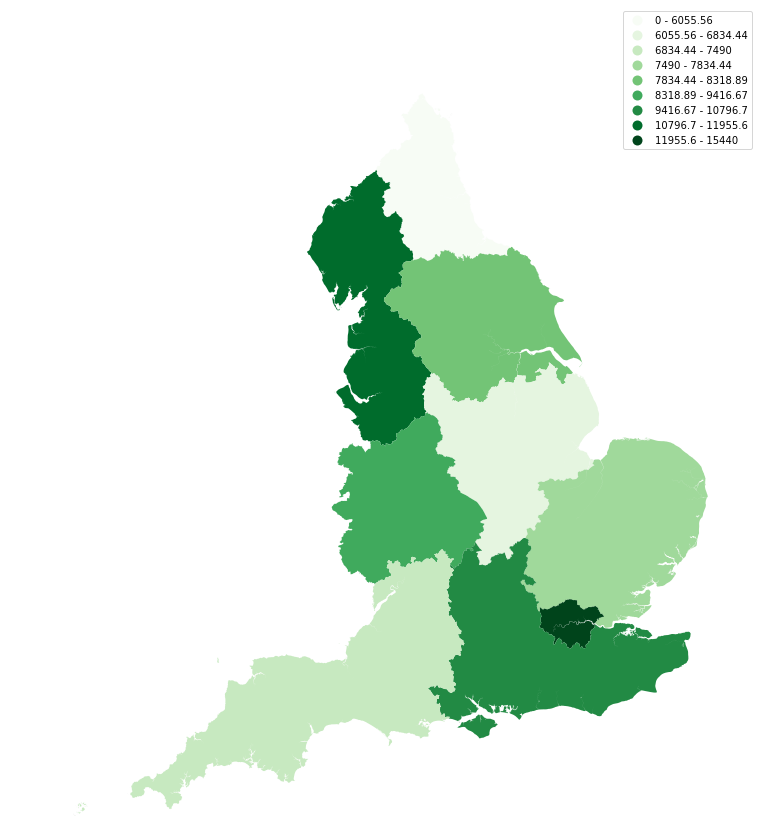

In [42]:


gpd_per_person = stats_gdf['ID'] 
scheme = mapclassify.Quantiles(gpd_per_person, k=9)

# Note: this code sample requires geoplot>=0.4.0.
geoplot.choropleth(
    lad, hue=gpd_per_person, scheme=scheme,
    cmap='Greens', figsize=(15,15),  projection=geoplot.crs.OSGB(),
    legend=True
)